<a href="https://colab.research.google.com/github/kamblechand/CAPSTONE-PROJECT-4--NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
####chand kamble.

# **Project Summary -**

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **GitHub Link -**

https://github.com/kamblechand/CAPSTONE-PROJECT-4--NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style= 'whitegrid', palette = 'mako')


from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/chand/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
#Dataset Last Look
df.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print('Numbers of duplicate values:' ,df.duplicated().sum())

Numbers of duplicate values: 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

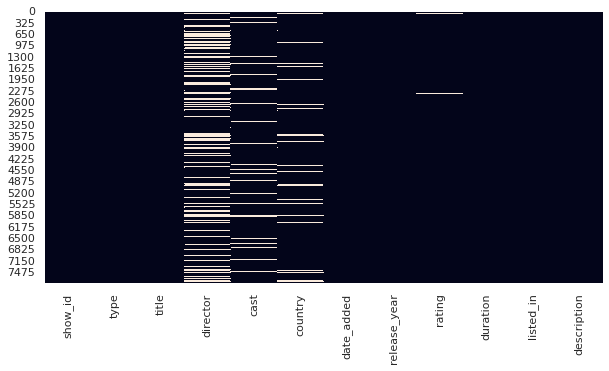

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?


*   Dataset has 7787 rows and 12 columns.
*   Columns with missing values are director,cast,country, date_added and rating.
*   There is no duplicate values present.





## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for columns in  list(df.columns):
  print(f'Numbers of unique values in {columns} are:\n{df[columns].nunique()}')

Numbers of unique values in show_id are:
7787
Numbers of unique values in type are:
2
Numbers of unique values in title are:
7787
Numbers of unique values in director are:
4049
Numbers of unique values in cast are:
6831
Numbers of unique values in country are:
681
Numbers of unique values in date_added are:
1565
Numbers of unique values in release_year are:
73
Numbers of unique values in rating are:
14
Numbers of unique values in duration are:
216
Numbers of unique values in listed_in are:
492
Numbers of unique values in description are:
7769


In [16]:
#check types of content on netflix and their counts.
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [17]:
#check various types of ratings and their counts.
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [18]:
#Top countries 
df['country'].value_counts()[:20]

United States                    2555
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: country, dtype: int64

In [19]:
#release year and their counts
df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [20]:
#counting top 30 genres by occurence
df['listed_in'].value_counts()[:30]

Documentaries                                             334
Stand-Up Comedy                                           321
Dramas, International Movies                              320
Comedies, Dramas, International Movies                    243
Dramas, Independent Movies, International Movies          215
Kids' TV                                                  205
Children & Family Movies                                  177
Documentaries, International Movies                       172
Children & Family Movies, Comedies                        169
Comedies, International Movies                            161
Dramas, International Movies, Romantic Movies             153
Comedies, International Movies, Romantic Movies           139
Dramas                                                    117
Action & Adventure, Dramas, International Movies          117
International TV Shows, TV Dramas                         111
Dramas, International Movies, Thrillers                   109
Crime TV

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
df.dropna(subset=['rating'],inplace=True)
df.dropna(subset=['date_added'],inplace=True)


In [22]:
#Replacing null values .
df[['director']] = df[['director']].fillna('Unknown')
df[['country']] = df[['country']].fillna('Unknown')
df[['cast']] = df[['cast']].fillna('Unknown')



In [23]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

We got 5 columns- "director","cast","country","date_added"and "rating" , with null values in it. Dropping whole rows with null values would lead to loss of information. Also, since all of these columns have object d-type therefore we cannot simply replace their null values with the mean or median. Better approach would be to replace null values with a clear text indicating "No Data".But before that, we have to get rid of null values in "date_added" column by dropping them as there are only 10 numbers and it would be convinient for us in future while extracting Month and Year from the column.

###Feature Engineering.

In [24]:
#converting date_added into date_time format
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

In [25]:
#extracting date ,month,year and creating new features.
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [26]:
#Dropping 'date_added' as we create seperate columns
df.drop(columns="date_added",axis=1,inplace=True)


In [27]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))


In [28]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
#df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])


### What all manipulations have you done and insights you found?



*   Converting 'date_added' column into date time format to extract day, month, year.
*   Adding new features 'day_added','year_added' and 'month_added' .
*   Splitting the duration column .





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1(Univariate Analysis)
###1. Distribution of Type of Content : TV Shows and Movies

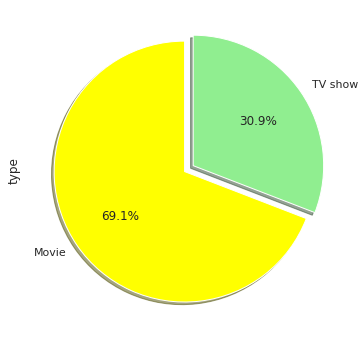

In [29]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset

df['type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Movie','TV show'],
                               colors=['yellow','lightgreen'],
                               explode=(0.025,0.055))

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.


##### 2. What is/are the insight(s) found from the chart?

From this pie plot we can conclude that 69.1% are movies and 30.9% are TV-shows.



### Chart - 2
###Release year of TV-shows/Movies.

In [30]:
# Chart - 3 visualization code.
movies = df[df["type"]=="Movie"]
shows = df[df["type"]=="TV Show"]

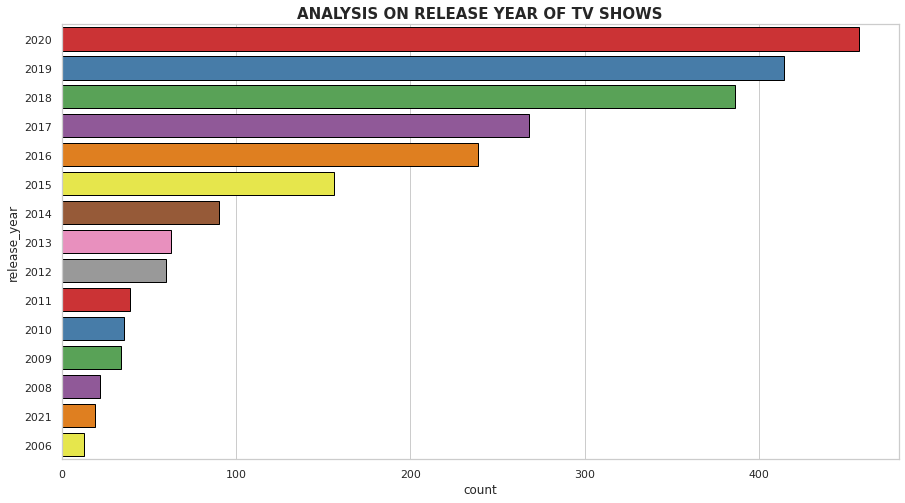

In [31]:
# Chart - 2 visualization code

#ANALYSIS ON RELEASE YEAR OF TV Show
plt.figure(figsize=(15,8))
ax = sns.countplot(y="release_year", data=shows, palette="Set1", order=shows['release_year'].value_counts().index[0:15],lw=1, ec='black')

plt.title('ANALYSIS ON RELEASE YEAR OF TV SHOWS', fontsize=15, fontweight='bold')
plt.show()

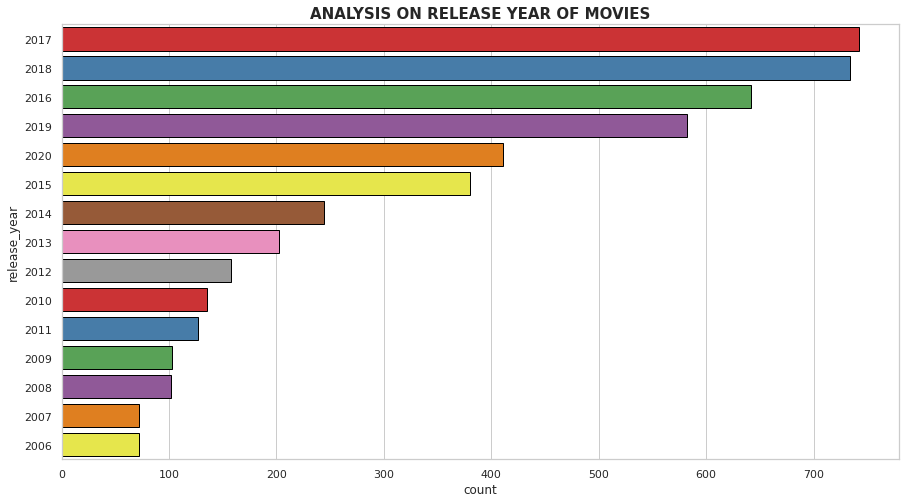

In [32]:
# Chart - 2 visualization code

#ANALYSIS ON RELEASE YEAR OF MOVIES
plt.figure(figsize=(15,8))
ax = sns.countplot(y="release_year", data=movies, palette="Set1", order=movies['release_year'].value_counts().index[0:15],lw=1, ec='black')
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

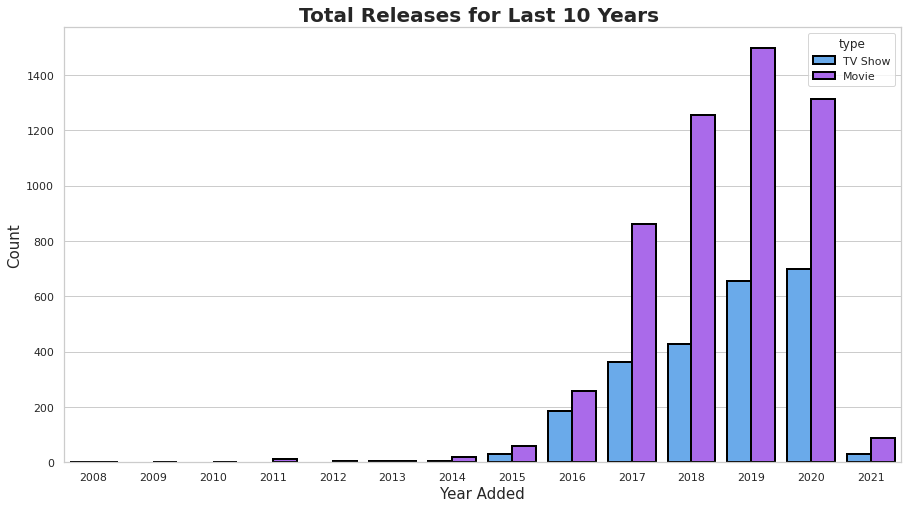

In [33]:
# Total release for last 10 years
plt.figure(figsize=(15,8))
sns.countplot(x='year_added',hue='type',data=df,palette='cool',lw=2, ec='black')

plt.title('Total Releases for Last 10 Years ',fontsize = 20,fontweight="bold")  
plt.xlabel('Year Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)   
plt.show()
     


##### 1. Why did you pick the specific chart?

countplot() method is used to Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

Most of the TV Shows were released in 2020 followed by 2019 and 2018.

Most of the Movies were released in 2017 and 2018.

Growth in the number of movies on Netflix is much higher than TV shows.



### Chart - 3
###Most frequent days/Months.

Text(0.5, 1.0, 'Most frequent days')

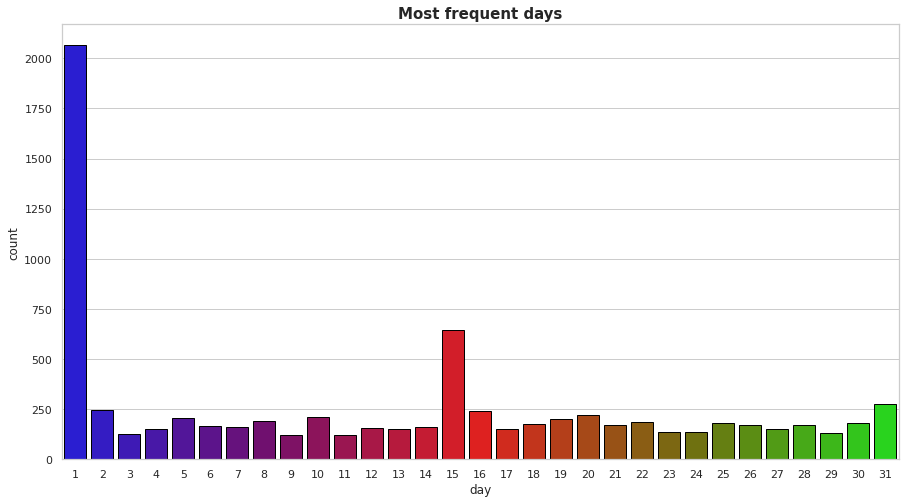

In [34]:

# Create dataframe to store day values and count.
days_df = pd.DataFrame(df.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)
     

plt.figure(figsize=(15,8))
fig = sns.barplot(data = days_df, x="day", y="count",palette="brg",lw=1, ec='black')
plt.title('Most frequent days',fontsize=15, fontweight='bold')
     

Text(0.5, 1.0, 'Most frequent months')

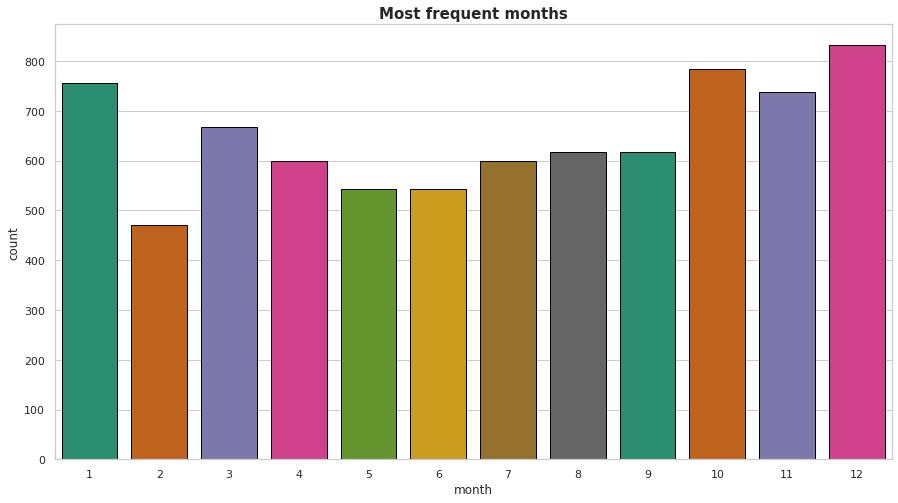

In [35]:

# Create dataframe to store month values and count.
month_df = pd.DataFrame(df.month_added.value_counts())
month_df.reset_index(inplace=True)
month_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)
     

plt.figure(figsize=(15,8))
fig = sns.barplot(data = month_df, x="month", y="count",palette="Dark2",lw=1, ec='black')
plt.title('Most frequent months',fontsize=15, fontweight='bold')
     

Text(0.5, 1.0, 'Monthwise content addition')

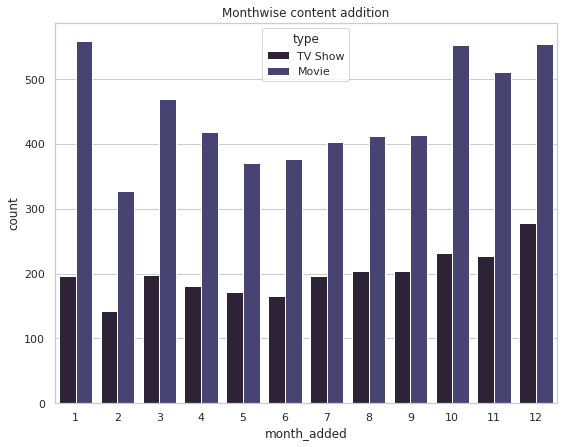

In [36]:

#Plotting a countplot for getting better insights from monthwise addition
plt.figure(figsize=(9,7))
sns.countplot(x='month_added',hue='type',data=df)
plt.title("Monthwise content addition")


##### 2. What is/are the insight(s) found from the chart?

Most of the content gets uploaded in the beginning and the middle of the month.

Most of the content is uploaded either by year ending or beginning.

October, November, December, and January are months in which many shows and movies get uploaded to the platform.

### Chart - 4
### Type and Ratings.

###Ratings

Netflix Rating of Movies/TV Shows based on content:-

TV-MA :for Mature Audiences

R : Restricted

PG-13 : Parents strongly cautioned. May be Inappropriate for ages 12 and under

TV-14 : Parents strongly cautioned. May not be suitable for ages 14 and under

TV-PG : Parental Guidance suggested

NR : Not Rated

TV-G : Suitable for General Audiences

TV-Y : Designed to be appropriate for all children

PG : Parental Guidance suggested

G : Suitable for General Audiences

NC-17 : the content isn't suitable for children under 17 and younger

TV-Y7-FV : Suitable for ages 7 and up

UR : Unrated

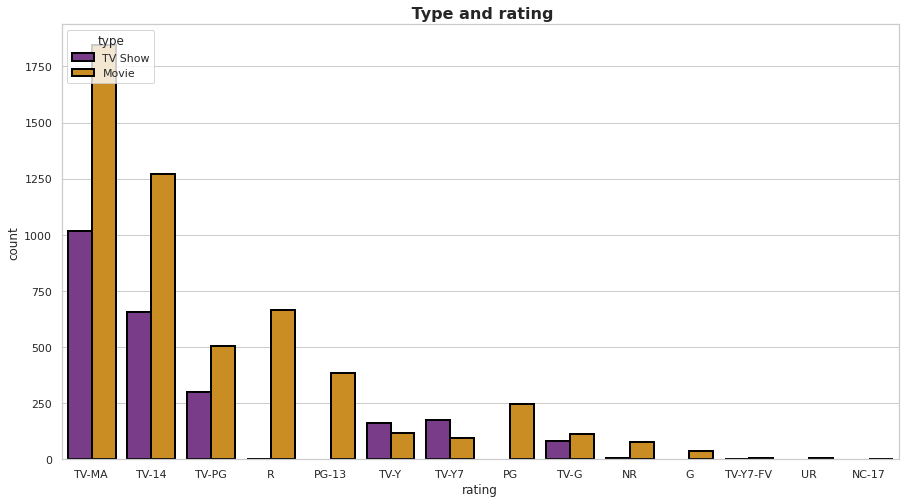

In [37]:
# Chart - 4 visualization code
#Rating
plt.figure(figsize=(15,8))
sns.countplot(x='rating',hue='type',data=df,palette="CMRmap", order=df['rating'].value_counts().index[0:15],lw=2, ec='black')
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.


Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".



### Chart - 5
### Top generes in Movies.

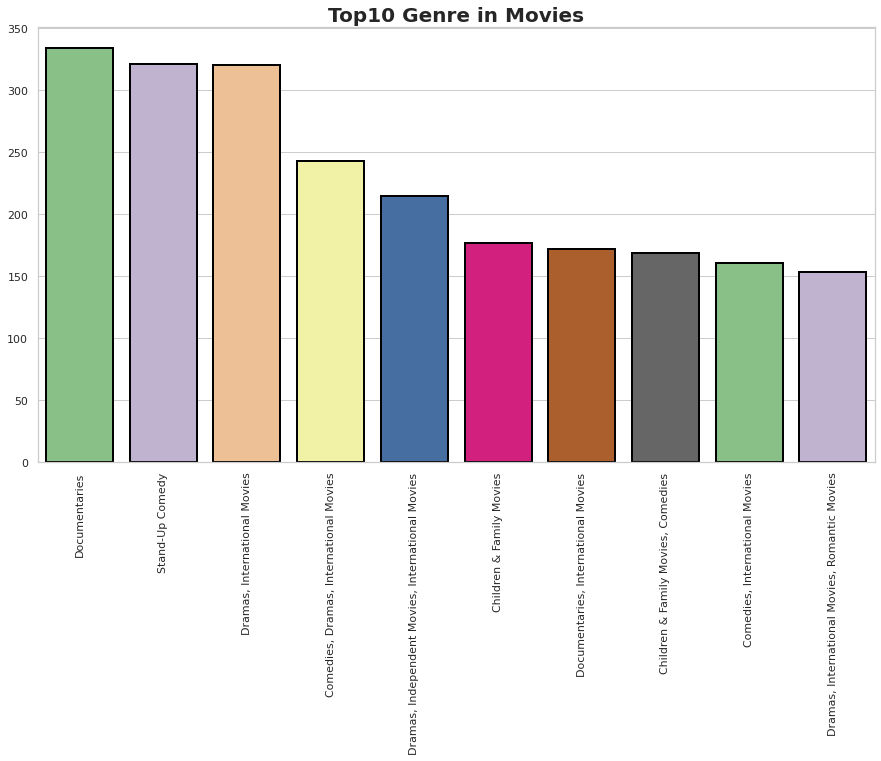

In [38]:
# Chart - 5 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x =movies["listed_in"].value_counts().head(10).index,
            y=movies['listed_in'].value_counts().head(10).values,palette='Accent',lw=2, ec='black')
plt.title("Top10 Genre in Movies",fontsize = 20,fontweight="bold")
plt.xticks(rotation=90)

plt.show()


##### 2. What is/are the insight(s) found from the chart?

from the above graph Documentries ,comedies, dramas movies are the top 3 genre in netflix movies.

### Chart - 6
### Top generes in TV-shows.

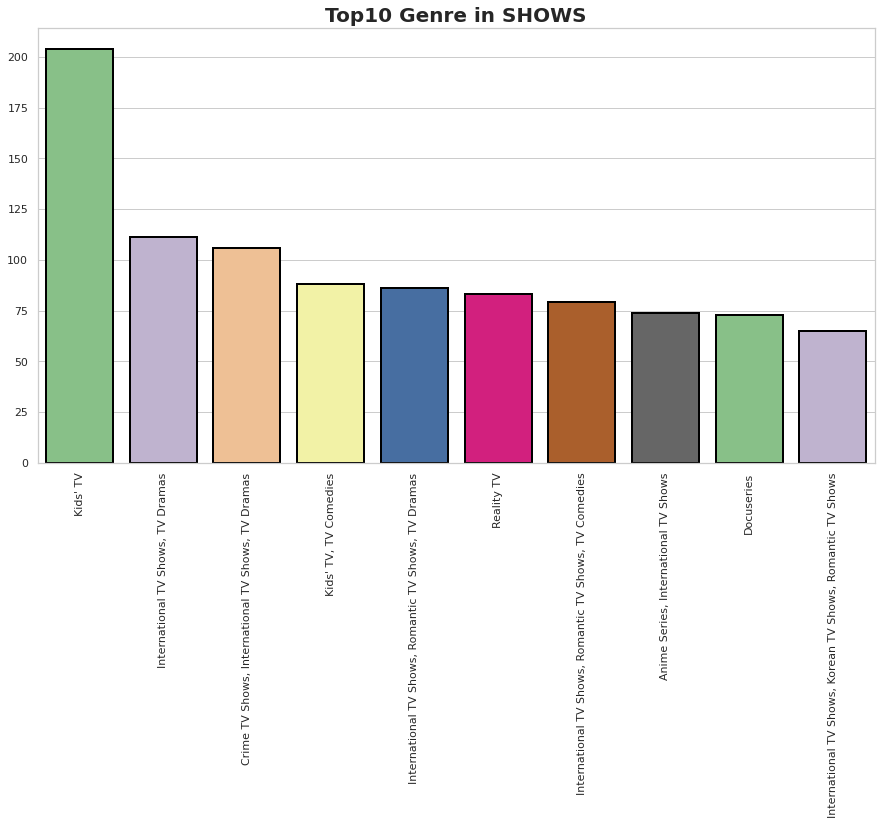

In [39]:
# Chart - 6 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x =shows["listed_in"].value_counts().head(10).index,
            y=shows['listed_in'].value_counts().head(10).values,palette='Accent',lw=2, ec='black')
plt.title("Top10 Genre in SHOWS",fontsize = 20,fontweight="bold")
plt.xticks(rotation=90)

plt.show()


##### 2. What is/are the insight(s) found from the chart?

from the above graph international tv shows, crime tv shows and kids tv are the top 3 genre in netflix TV-shows.

### Chart - 7
### longest TV-shows.

In [40]:
# Chart - 7 visualization code
#LONGEST TV - SHOWS (seasons)
long_shows = shows[shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
long_shows_data.sort_values(by=['duration'],ascending=False)


,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


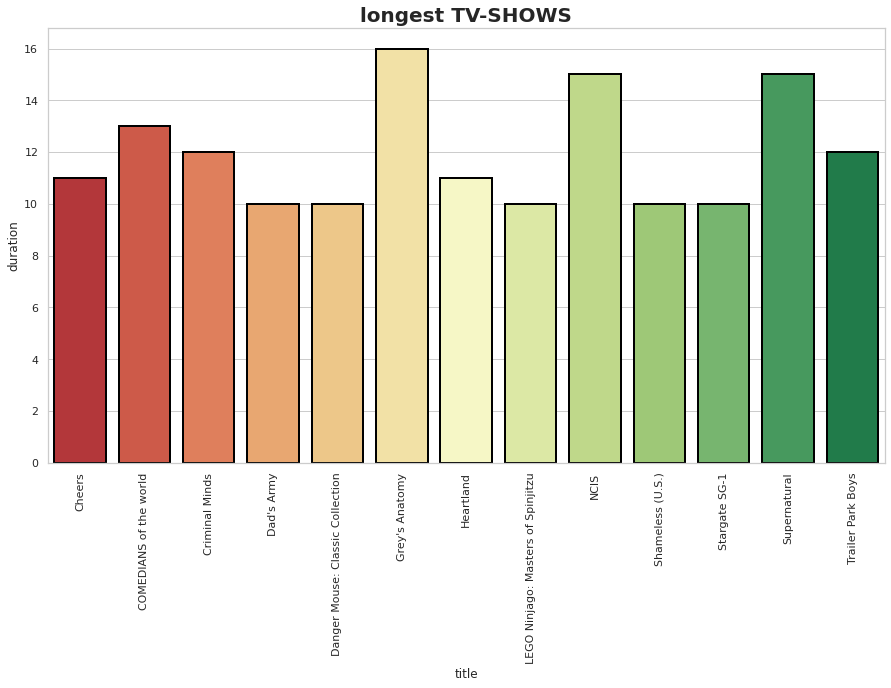

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(x='title',y='duration',data=long_shows_data,palette='RdYlGn',lw=2, ec='black')
plt.title("longest TV-SHOWS",fontsize = 20,fontweight="bold")
plt.xticks(rotation=90)

plt.show()


##### 2. What is/are the insight(s) found from the chart?

Grey anatomy,NCIS and supernatural are the longest running TV-shows.

### Chart - 8
### cast with most content on platform.

In [42]:
# Chart - 8 visualization code
df['cast'].value_counts().head(10)

Unknown                                                                                                                   718
David Attenborough                                                                                                         18
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
Kevin Hart                                                                                                                  6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Iliza Shlesinger                                                                                                      

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

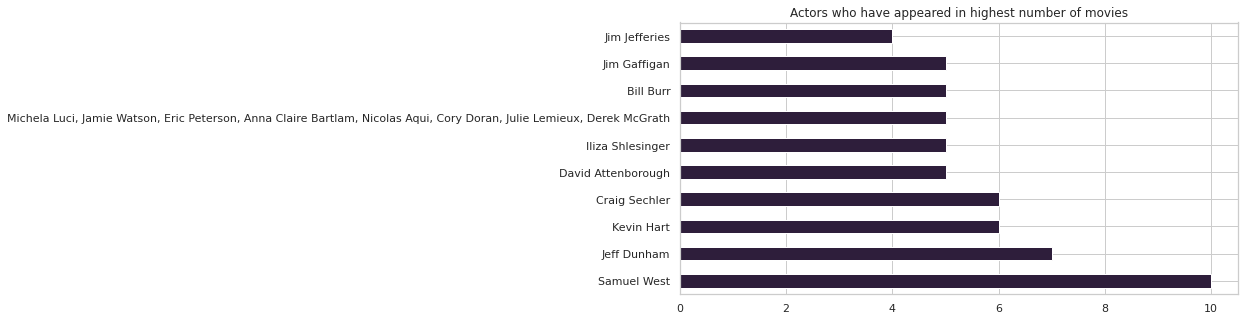

In [43]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

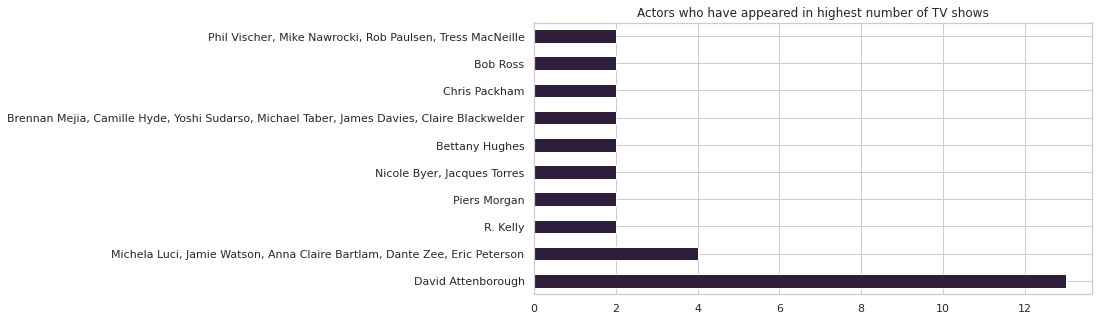

In [44]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

actors who have appeared highest number of movies. Top one actor in movies are Samuel West and second highest actor are jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart.

Actors who have appeared highest number of TV shows. Top one actor of TV Shows is David Attenborough and second highest actor in TV shows many are there like Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

### Chart - 9
### Movies duration.

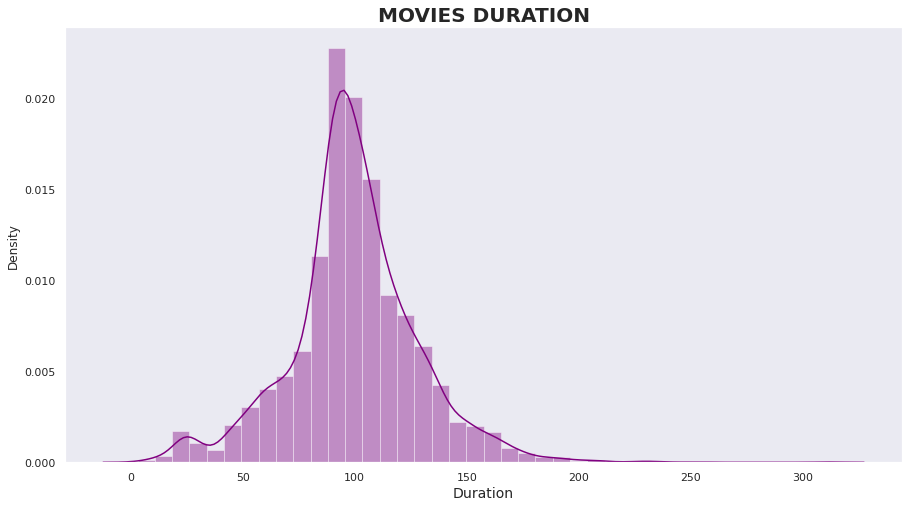

In [45]:
# Chart - 9 visualization code

plt.figure(figsize=(15,8))
sns.set(style='dark')

plot=sns.distplot(movies['duration'],bins=40,color='purple')

plt.title('MOVIES DURATION',fontsize = 20,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

##### 2. What is/are the insight(s) found from the chart?


 Distplot represents the overall distribution of continuous data variables 

 duration of most of the movies is 90 to 120 minutes.

### Chart - 10
### country wise content.

Text(0.5, 1.0, ' Top 10 countries with highest number of TV-shows')

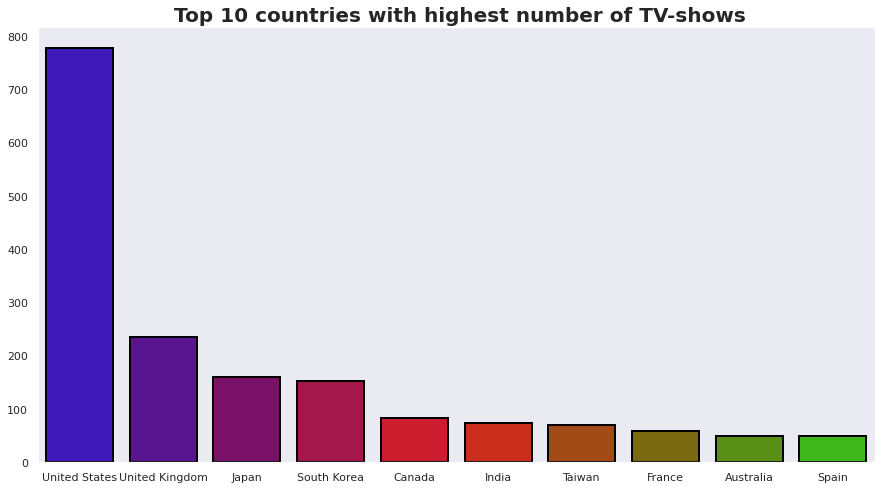

In [46]:
# Top 10 countries with the highest number movies / TV shows in the dataset

plt.figure(figsize=(15,8))

sns.barplot(x=shows[~(shows['country']=='Unknown')].country.value_counts().head(10).index,
            y=shows[~(shows['country']=='Unknown')].country.value_counts().head(10).values,palette='brg',lw=2, ec='black')
plt.title(' Top 10 countries with highest number of TV-shows',fontsize = 20,fontweight="bold")

##### 2. What is/are the insight(s) found from the chart?


Top three countries watches tv-shows are US ,UK and Japan.

US has the most viewers followed by japan and UK .

#### Chart - 11

Text(0.5, 1.0, ' Top 10 countries with highest number of movies')

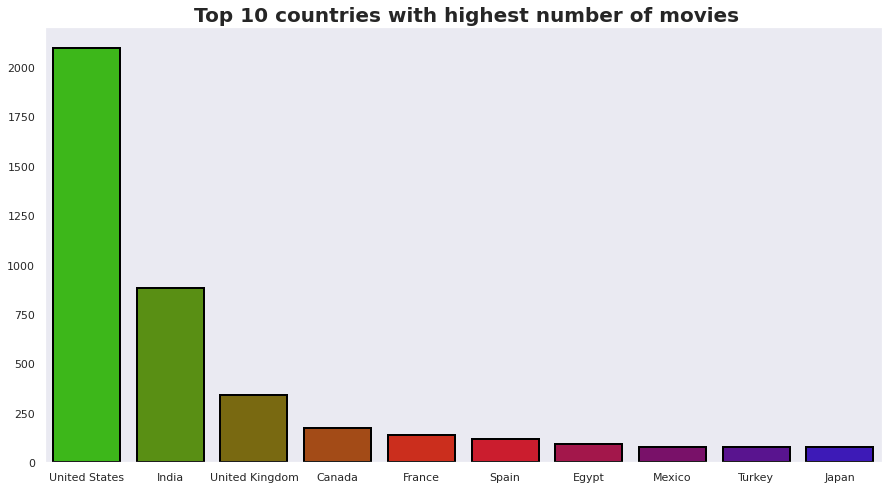

In [47]:
# Chart - 11 visualization code
plt.figure(figsize=(15,8))

sns.barplot(x=movies[~(movies['country']=='Unknown')].country.value_counts().head(10).index,
            y=movies[~(movies['country']=='Unknown')].country.value_counts().head(10).values,palette='brg_r',lw=2, ec='black')
plt.title(' Top 10 countries with highest number of movies',fontsize = 20,fontweight="bold")

##### 2. What is/are the insight(s) found from the chart?



Top three countries watches movies are US ,UK and INDIA.

US has the most viewers followed by INDIA and UK.

### Chart - 12
### Top 10 diredtors

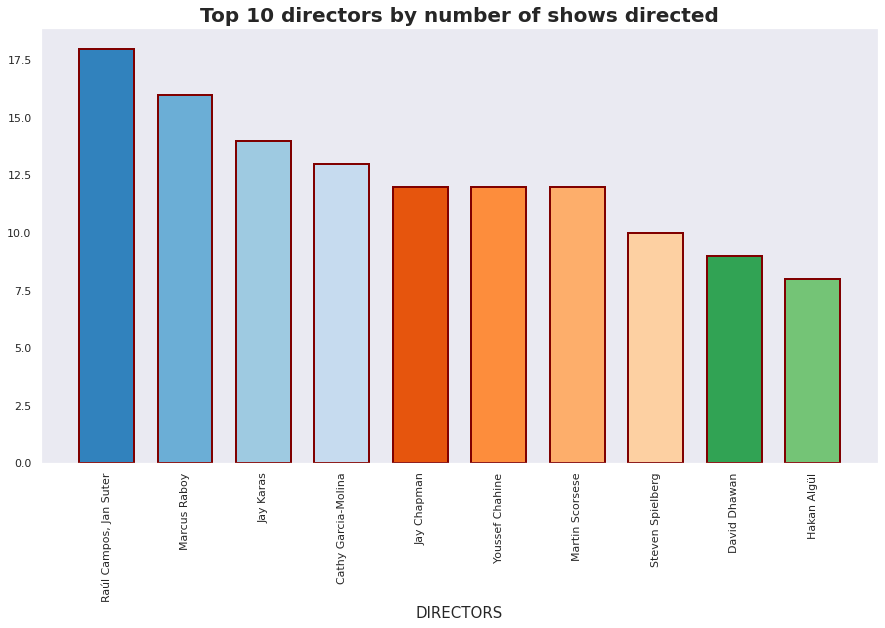

In [48]:
plt.figure(figsize=[15, 8])
col_map = plt.get_cmap('tab20c')

# Creating a bar chart from a dictionary
plt.bar(df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).index,
        df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).values, 
        width=0.7, color=col_map.colors, edgecolor='maroon', linewidth=2)

plt.title('Top 10 directors by number of shows directed',fontsize = 20,fontweight="bold")
plt.xticks(rotation=90)

plt.xlabel('DIRECTORS', fontsize=15)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors having most numbers of movies and TV shows.



#### Chart - 13

###Most occured words in Title feature.

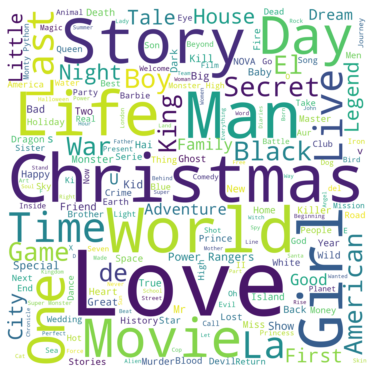

In [49]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)

# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 2000, height = 2000,).generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

###Most occured generes in netflix.

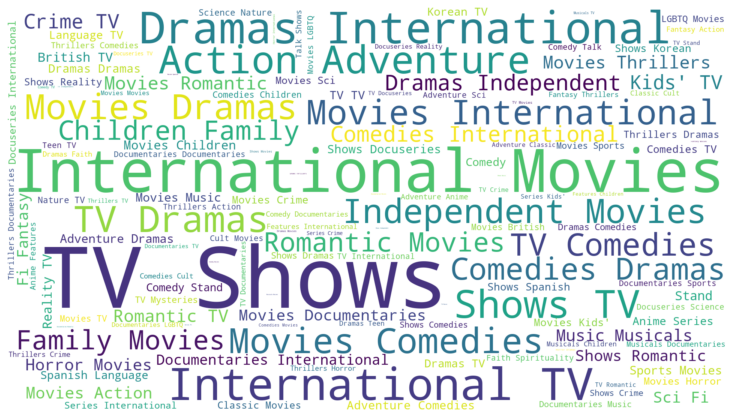

In [50]:

#subsetting df
text = " ".join(word for word in df['listed_in'])

# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 1920, height = 1080,).generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10,6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##### 1. Why did you pick the specific chart?

Word Cloud Chart is a visualization method that allows you to quickly see which words appear more frequently in a bunch of text.

The most frequently used words appear larger or bolder compared with the other words around them.

##### 2. What is/are the insight(s) found from the chart?

love , christmas, man, world, story ,etc are most appeared words in title of Movies and Tv-shows.

TV-shows,adventure, action,international tv, children, family are most generes of movies and tv-shows on netflix.

#### Chart - 14 

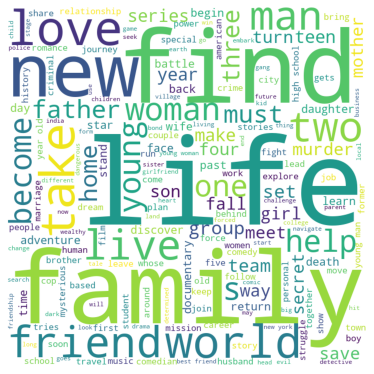

In [51]:
# Correlation Heatmap visualization code
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
     


##### 2. What is/are the insight(s) found from the chart?

Family, find, life, new, love, friend,etc are most appeared words in the description  of Movies and Tv-shows.

## ***Data Pre-processing***

In [52]:
#creating copy of dataset.
df_cluster = df.copy()

# df_cluster first look.
df_cluster.loc[:,:].head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,1


In [53]:
df_cluster.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'year_added', 'month_added'],
      dtype='object')

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Text pre-processing is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc. There are different steps in text pre-processing like - removing stopwords and punctuations , stemming of words etc. Let us start the preprocessing task.

#### 1. Import liabraries.

In [54]:
#importing libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import re, string, unicodedata


import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
# Expand Contraction
# Combining all the clustering attributes into a single column

df_cluster['clustering'] = (df_cluster['director'] + ' ' + 
                                df_cluster['cast'] +' ' + 
                                df_cluster['country'] +' ' + 
                                df_cluster['listed_in'] +' ' + 
                                df_cluster['description'])


In [56]:
# Select the 100 number of clusters for the dataset 
df_cluster['clustering'][7782]
     

"Josef Fares Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad Sweden Dramas, International Movies When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents."

#### 2. Lower Casing

In [57]:
# Lower Casing
# we will convert all words in lowercase
df_cluster['clustering'] = df_cluster['clustering'].str.lower()


In [58]:
# Select the 100 number of clusters for the dataset 
df_cluster['clustering'][7782]
     

"josef fares imad creidi, antoinette turk, elias gergi, carmen lebbos, viktor axelsson, charbel iskandar, yasmine awad sweden dramas, international movies when lebanon's civil war deprives zozo of his family, he's left with grief and little means as he escapes to sweden in search of his grandparents."

#### 3. Removing Punctuations

We need to carefully choose the list of punctuation which we are going to discard based on the use case.To remove punctuation let's create a function and apply them on our variables

In [59]:
# Remove Punctuations
def remove_punct(text):
  ''' a function for removing punctuation'''
  import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks
  translator=str.maketrans('','',string.punctuation)
    # return the text stripped of punctuation marks
  return text.translate(translator)

In [60]:
#applying function
df_cluster['clustering'] = df_cluster['clustering'].apply(remove_punct)
df_cluster['clustering'][7782]

'josef fares imad creidi antoinette turk elias gergi carmen lebbos viktor axelsson charbel iskandar yasmine awad sweden dramas international movies when lebanons civil war deprives zozo of his family hes left with grief and little means as he escapes to sweden in search of his grandparents'

#### 4. Removing URLs & Removing words and digits contain digits.

In [61]:
# Remove URLs & Remove words and digits contain digits
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
     

In [62]:
# remove non-ascii characters
df_cluster['clustering']= remove_non_ascii(df_cluster['clustering'])

In [63]:
# Select the 100 number of clusters for the dataset 
df_cluster['clustering'][0]

'unknown joao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschi brazil international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 5. Removing Stopwords & Removing White spaces


With english, among many popular languages, stop words are common words within sentences that do not add value and thus can be eliminated when cleaning for NLP prior to analysis.We will make good use of the NLTK library by importing the pre-programmed english stop words library.

In [64]:
#extracting the stopwords from nltk library
sw=stopwords.words('english')
#displaying the stopwords 
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [65]:
# Remove Stopwords

def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text=[word.lower() for word in text.split() if word not in sw]
  # joining the list of words with space separator
  return ' '.join(text)

In [66]:
# Remove White spaces
#applying function
df_cluster['clustering'] = df_cluster['clustering'].apply(remove_stopwords)
df_cluster['clustering'][7782]

'josef fares imad creidi antoinette turk elias gergi carmen lebbos viktor axelsson charbel iskandar yasmine awad sweden dramas international movies lebanons civil war deprives zozo family hes left grief little means escapes sweden search grandparents'

#### 7. Text Normalization(stemming)

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [67]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
     

In [68]:
# Lemmatization
df_cluster['clustering'] = lemmatize_verbs(df_cluster['clustering'])

In [69]:
# Select the 100 number of clusters for the dataset 
df_cluster['clustering'][0]

'unknown joao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschi brazil international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

###8. Tokenization

In [70]:

# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [71]:

# Create text column based on dataset
df_cluster['clustering'] = df_cluster['clustering'].apply(lambda x: tokenizer.tokenize(x))

In [72]:
# Select the 100 number of clusters for the dataset 
print(df_cluster['clustering'][7782])

['josef', 'fares', 'imad', 'creidi', 'antoinette', 'turk', 'elias', 'gergi', 'carmen', 'lebbos', 'viktor', 'axelsson', 'charbel', 'iskandar', 'yasmine', 'awad', 'sweden', 'dramas', 'international', 'movies', 'lebanons', 'civil', 'war', 'deprives', 'zozo', 'family', 'hes', 'left', 'grief', 'little', 'means', 'escapes', 'sweden', 'search', 'grandparents']


### 10. Text Vectorization

In [73]:
# Vectorizing Text
# clustering tokens saved in a variable
clustering_vectorization = df_cluster['clustering']

In [74]:
# Tokenization
def tokenizer(text):
  return text
  
# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)

In [75]:
# Dataset Rows & Columns count
x.shape

(7770, 20000)

In [76]:
# convert X into array form for clustering
X = x.toarray()

# Check the matrix
X     

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction brings many advantages to your machine learning data, including: Fewer features mean less complexity. You will need less storage space because you have fewer data. Fewer features require less computation time.

In [77]:
# DImensionality Reduction (If needed)

# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(X)
     

PCA(random_state=42)

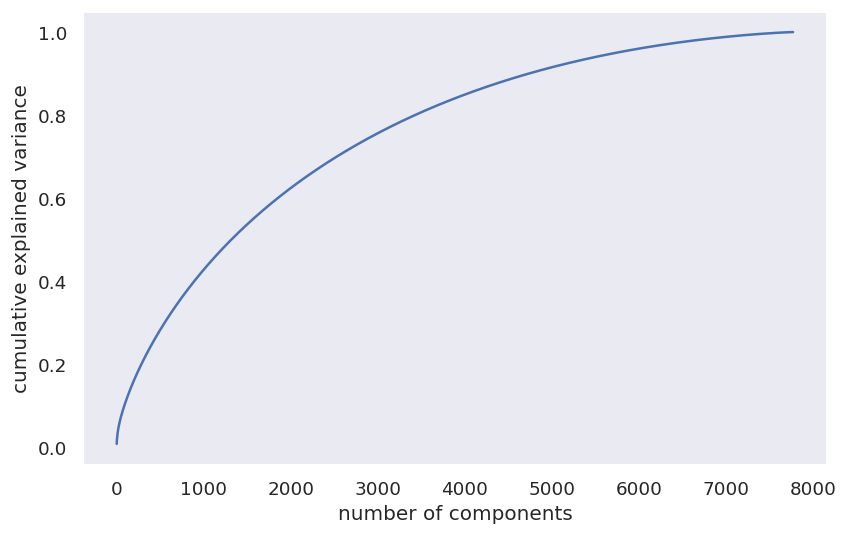

In [78]:
# Explained variance for different number of components
plt.figure(figsize=(8,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

1. We can see from the above plot almost 95% of the variance can be explained by 5000 components.
2. Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.

In [79]:
# reducing the dimensions to 6000 using pca
pca = PCA(n_components=0.95,random_state=42)
pca.fit(X)

PCA(n_components=0.95, random_state=42)

In [80]:
# transformed features
X_pca= pca.transform(X)
     
# shape of transformed vectors
X_pca.shape
     

(7770, 5731)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

We have prepared and scaled our data set for applying the ML models, our dataset doesn't have any target variable to predict, and as given in the problem statement we have to apply some Unsupervised Machine learning models to make some clusters out from the dataset.

## ***7. ML Model Implementation***

### ML Model - 1   K-MEANS CLUSTERING.

K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.Let's go ahead and import important tools to apply K-mean clustering

In [81]:
# importing required modules from sklearn library
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

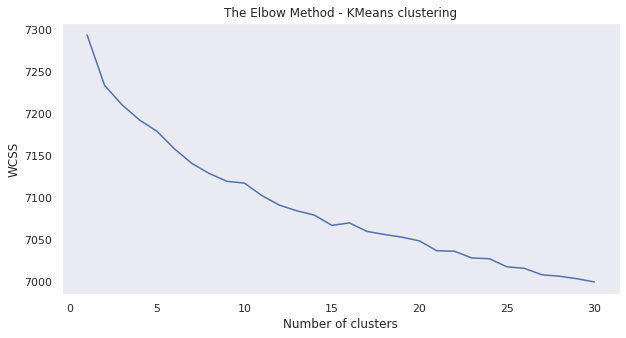

In [82]:
#Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


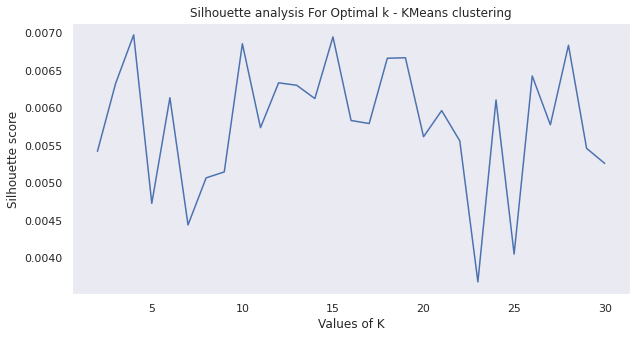

In [83]:

# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [84]:

# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=40)
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=40)

In [85]:
# Adding a kmeans cluster number attribute
df_cluster['kmeans_cluster'] = kmeans.labels_


In [86]:

# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(7189.2164625228725, 0.007217199261467089)


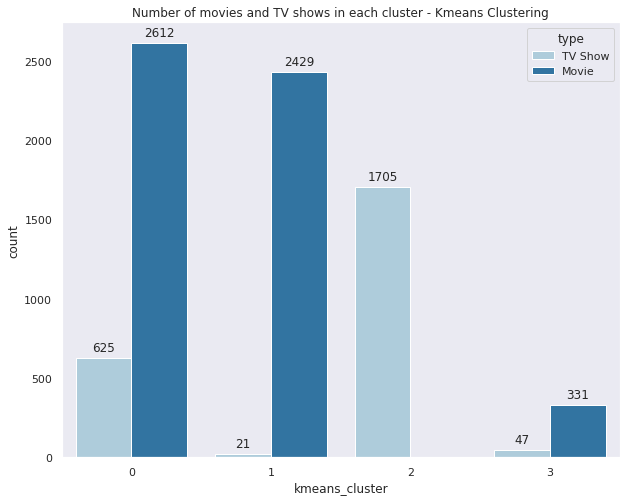

In [87]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,8))
q = sns.countplot(x='kmeans_cluster',data=df_cluster, hue='type',palette='Paired')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

In [88]:
from wordcloud import WordCloud, STOPWORDS

# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df_cluster[df_cluster['clustering']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)



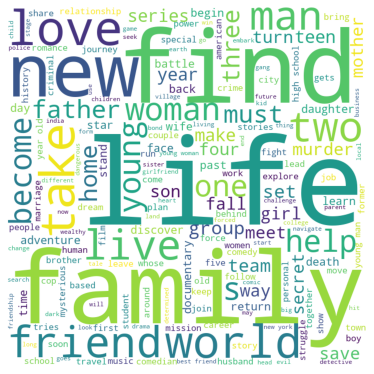

In [89]:

plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)  

### 2.Hierarchical clustering:


Hierarchical clustering is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis.In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.The hierarchical clustering technique has two approaches:

Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

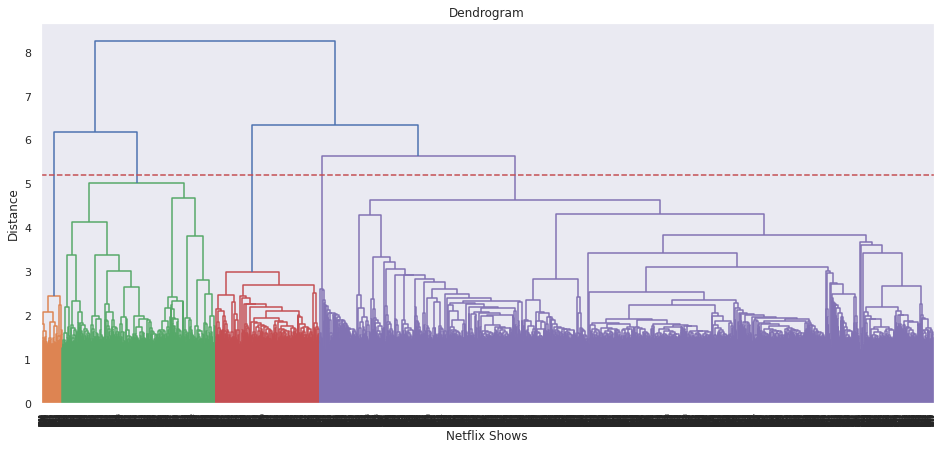

In [90]:
# Building a dendogram to decide on the number of clusters

plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5.2, color='r', linestyle='--')


In [91]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X_pca)

array([1, 1, 0, ..., 1, 2, 1])

In [92]:

# Adding a kmeans cluster number attribute
df_cluster['hierarchical_cluster'] = hierarchical.labels_

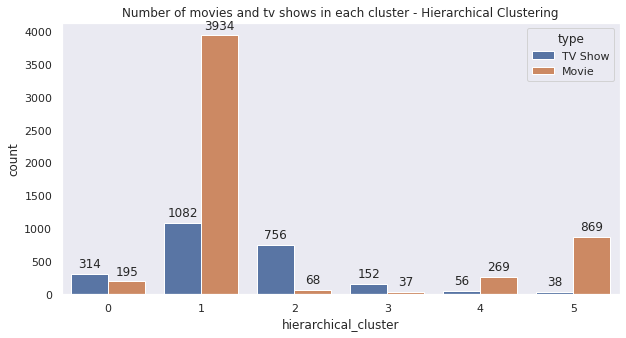

In [93]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df_cluster, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     


In [94]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df_cluster[df_cluster['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

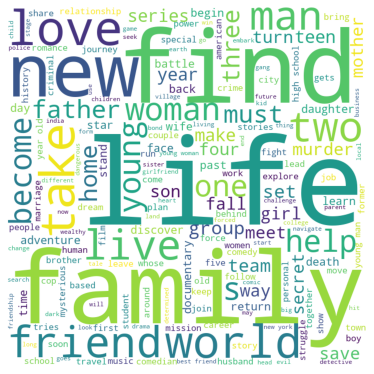

In [95]:
  # plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

###Using Content based recommender system


In [96]:

# Changing the index of the df from show id to show title
df_cluster['show_id'] = df_cluster.index

In [97]:

# converting tokens to string
def convert(lst):
  return ' '.join(lst)

df_cluster['clustering'] = df_cluster['clustering'].apply(lambda x: convert(x))

In [98]:
# setting title of movies/Tv shows as index
df_cluster.set_index('title',inplace=True)

In [99]:

# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df_cluster['clustering'])

In [100]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [101]:

# Dataset Rows & Columns count
cosine_similarity.shape

(7770, 7770)

In [102]:

# Developing a function to get 10 recommendations for a show
indices = pd.Series(df_cluster.index)

def Dataset_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df_cluster.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [103]:

# Recommendations for 'A Family Man'
Dataset_10('A Family Man')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Little Baby',
 'My Mister',
 'Extracurricular',
 'Miss Panda & Mr. Hedgehog',
 'Chef & My Fridge',
 'Busted!']

In [104]:

# Recommendations for 'Beauty & the Beast'
Dataset_10('Beauty & the Beast')


If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'London Spy',
 'Giri / Haji',
 'I AM A KILLER: RELEASED',
 'The Murder Detectives',
 'My Hotter Half']

In [105]:

# Recommendations for 'Chup Chup Ke'
Dataset_10('Chup Chup Ke')
     


If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Zombie Dumb',
 'Warrior Nun',
 'Scream',
 'Nightflyers',
 'The Vampire Diaries',
 'The Sinner']

# **Conclusion**

The dataset contained about 7787 records, and 12 attributes. We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

In this dataset there are two types of contents where 30.86% include TV shows and the remaining 69.14% carries Movies.

From the dataset insights we can conclude that the most number of TV Shows have released in 2017 and Movies in 2020.

Netflix USA has the largest number of contents and most of the countries prefer to produce movies more than TV shows.

TOP 3 content categories are International movies, dramas and comedies.

In text analysis (NLP), we have used stop words, removed punctuations , stemming & TF-IDF vectorizer and other functions of NLP.

we decided to cluster the data based on the attributes( director, cast, country, genre, and description). The values in these attributes were tokenized, preprocessed, and then vectorized using TF-IDF vectorizer.

We have applied different clustering models like Kmeans, hierarchical on data and got the best cluster arrangements.

By applying different clustering algorithms to our dataset, we got the optimal number of cluster, which is equal to 3.

From this clustering analysis, we create Netflix movies and TV shows recommendation system.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***